# SVM Project(IRIS) 

In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv), data manipulation as in SQL
import matplotlib.pyplot as plt # this is used for the plot the graph
import seaborn as sns


# import the dataset

In [4]:
iris = pd.read_excel("C:\Users\HP\Desktop\project data set\iris.xlsx")
iris.head() # give the top five row 

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [5]:
type(iris) ## to fine the data type 
iris=iris.replace({ 
    "setosa": 1,
    "versicolor": 2,
    "virginica" : 3
})#### change with number

In [6]:
iris.describe() ## describe the data set

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,2.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,1.000000
25%,5.100000,2.800000,1.600000,0.300000,1.000000
50%,5.800000,3.000000,4.350000,1.300000,2.000000
75%,6.400000,3.300000,5.100000,1.800000,3.000000
max,7.900000,4.400000,6.900000,2.500000,3.000000


In [10]:
iris.isnull().sum() ## to find the null value in the dataset

Sepal.Length    0
Sepal.Width     0
Petal.Length    0
Petal.Width     0
Species         0
dtype: int64

In [11]:
iris.columns ## to fine the 

Index([u'Sepal.Length', u'Sepal.Width', u'Petal.Length', u'Petal.Width',
       u'Species'],
      dtype='object')

# Exploratory Data Analysis

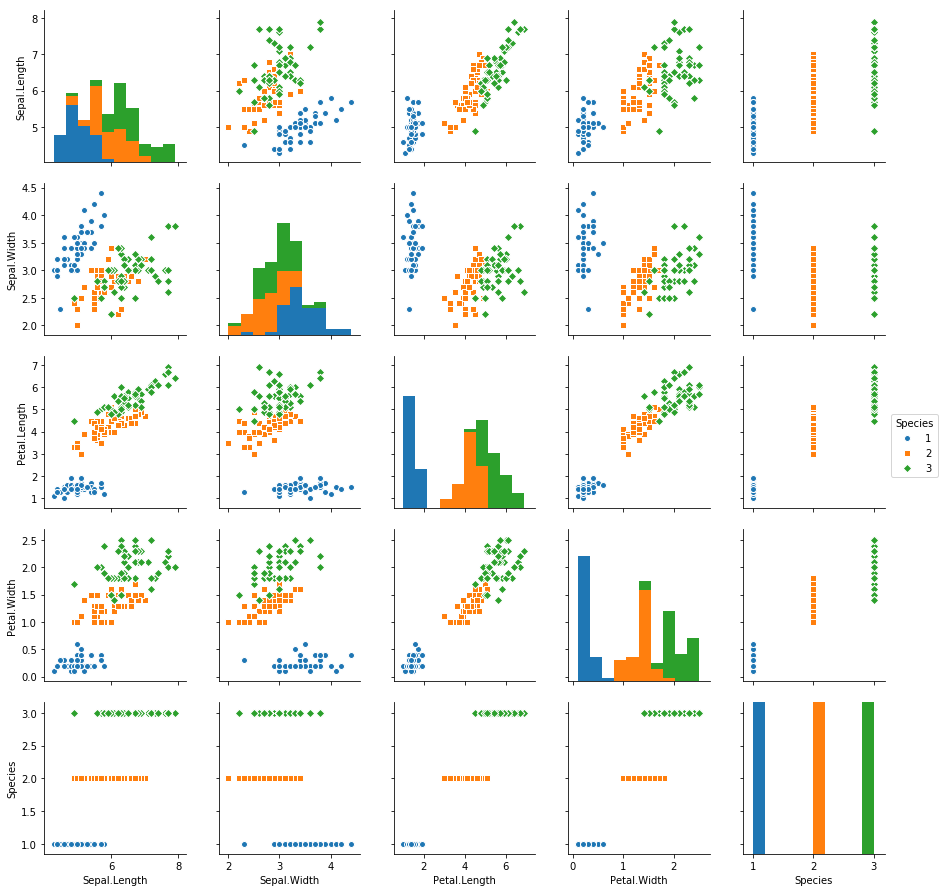

In [16]:
# Create a pairplot of the data set. Which flower species seems to be the most separable?

sns.pairplot(iris,hue='Species',markers=["o", "s", "D"])

## independernt variable

In [40]:
#### frature of the matrix
X=iris.iloc[:,[0,2]]
X[0:4]

,Sepal.Length,Petal.Length
0,5.1,1.4
1,4.9,1.4
2,4.7,1.3
3,4.6,1.5


In [41]:
### predicted vector(depandent variable)
y=iris.iloc[:,4]
y[0:3]

0    1
1    1
2    1
Name: Species, dtype: int64

## Splitting the dataset into training & test dataset

In [42]:
### splitting the data set into the training and test data set
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test= train_test_split(X,y,test_size=0.20,random_state=1000)

# Frature Scalling

In [43]:
# frature scalling## 
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)

# Creating the Classifier and Fit the model

In [44]:
##Fitting the Kernel (SVM) the classifier to traning data
from sklearn.svm import SVC
Classifier = SVC(kernel='rbf',random_state=1)
Classifier.fit(X_train,y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=1, shrinking=True,
  tol=0.001, verbose=False)

# Predicting the TEST Result

In [45]:
# predicting the test result
y_pred=Classifier.predict(X_test)
y_pred[0:21]

array([2, 1, 3, 3, 1, 1, 2, 2, 1, 2, 3, 2, 1, 1, 3, 2, 3, 2, 1, 1, 2],
      dtype=int64)

In [46]:
y_test[0:21]

95     2
34     1
127    3
120    3
24     1
28     1
84     2
68     2
38     1
123    3
132    3
74     2
44     1
4      1
144    3
67     2
119    3
82     2
37     1
49     1
81     2
Name: Species, dtype: int64

# Making the Confusion matrix

In [47]:
# Making the Confusion matrix
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test, y_pred)
cm


array([[ 9,  0,  0],
       [ 0, 12,  0],
       [ 0,  1,  8]], dtype=int64)

In [48]:
### 
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

             precision    recall  f1-score   support

          1       1.00      1.00      1.00         9
          2       0.92      1.00      0.96        12
          3       1.00      0.89      0.94         9

avg / total       0.97      0.97      0.97        30



In [49]:
## find the accurecy_score
from sklearn.metrics import accuracy_score
acc=accuracy_score(y_test, y_pred)
acc

0.9666666666666667

# Gridsearch Practice
### Import GridsearchCV from SciKit Learn.

In [51]:
from sklearn.grid_search import GridSearchCV

In [53]:
# Create a dictionary called param_grid and fill out some parameters for C and gamma.

param_grid = {'C': [0.1,1, 10, 100, 1000], 'gamma': [1,0.1,0.01,0.001,0.0001], 'kernel': ['rbf']}

In [55]:
#Create a GridSearchCV object and fit it to the training data.

grid = GridSearchCV(SVC(),param_grid,refit=True,verbose=5)
#meta estimator

In [56]:
# May take awhile!
grid.fit(X_train,y_train)

Fitting 3 folds for each of 25 candidates, totalling 75 fits
[CV] kernel=rbf, C=0.1, gamma=1 ......................................
[CV] ............. kernel=rbf, C=0.1, gamma=1, score=0.756098 -   0.0s
[CV] kernel=rbf, C=0.1, gamma=1 ......................................
[CV] ............. kernel=rbf, C=0.1, gamma=1, score=0.804878 -   0.0s
[CV] kernel=rbf, C=0.1, gamma=1 ......................................
[CV] ............. kernel=rbf, C=0.1, gamma=1, score=0.842105 -   0.0s
[CV] kernel=rbf, C=0.1, gamma=0.1 ....................................
[CV] ........... kernel=rbf, C=0.1, gamma=0.1, score=0.658537 -   0.0s
[CV] kernel=rbf, C=0.1, gamma=0.1 ....................................
[CV] ........... kernel=rbf, C=0.1, gamma=0.1, score=0.682927 -   0.0s
[CV] kernel=rbf, C=0.1, gamma=0.1 ....................................
[CV] ........... kernel=rbf, C=0.1, gamma=0.1, score=0.684211 -   0.0s
[CV] kernel=rbf, C=0.1, gamma=0.01 ...................................
[CV] .......... 

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s


[CV] ......... kernel=rbf, C=0.1, gamma=0.001, score=0.634146 -   0.0s
[CV] kernel=rbf, C=0.1, gamma=0.001 ..................................
[CV] ......... kernel=rbf, C=0.1, gamma=0.001, score=0.682927 -   0.0s
[CV] kernel=rbf, C=0.1, gamma=0.001 ..................................
[CV] ......... kernel=rbf, C=0.1, gamma=0.001, score=0.684211 -   0.0s
[CV] kernel=rbf, C=0.1, gamma=0.0001 .................................
[CV] ........ kernel=rbf, C=0.1, gamma=0.0001, score=0.634146 -   0.0s
[CV] kernel=rbf, C=0.1, gamma=0.0001 .................................
[CV] ........ kernel=rbf, C=0.1, gamma=0.0001, score=0.682927 -   0.0s
[CV] kernel=rbf, C=0.1, gamma=0.0001 .................................
[CV] ........ kernel=rbf, C=0.1, gamma=0.0001, score=0.684211 -   0.0s
[CV] kernel=rbf, C=1, gamma=1 ........................................
[CV] ............... kernel=rbf, C=1, gamma=1, score=0.878049 -   0.0s
[CV] kernel=rbf, C=1, gamma=1 ........................................
[CV] .

[CV] ........ kernel=rbf, C=1000, gamma=0.001, score=0.902439 -   0.0s
[CV] kernel=rbf, C=1000, gamma=0.001 .................................
[CV] ........ kernel=rbf, C=1000, gamma=0.001, score=0.975610 -   0.0s
[CV] kernel=rbf, C=1000, gamma=0.001 .................................
[CV] ........ kernel=rbf, C=1000, gamma=0.001, score=1.000000 -   0.0s
[CV] kernel=rbf, C=1000, gamma=0.0001 ................................
[CV] ....... kernel=rbf, C=1000, gamma=0.0001, score=0.829268 -   0.0s
[CV] kernel=rbf, C=1000, gamma=0.0001 ................................
[CV] ....... kernel=rbf, C=1000, gamma=0.0001, score=0.975610 -   0.0s
[CV] kernel=rbf, C=1000, gamma=0.0001 ................................
[CV] ....... kernel=rbf, C=1000, gamma=0.0001, score=0.921053 -   0.0s


[Parallel(n_jobs=1)]: Done  75 out of  75 | elapsed:    1.7s finished


GridSearchCV(cv=None, error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'kernel': ['rbf'], 'C': [0.1, 1, 10, 100, 1000], 'gamma': [1, 0.1, 0.01, 0.001, 0.0001]},
       pre_dispatch='2*n_jobs', refit=True, scoring=None, verbose=5)

In [57]:
grid.best_params_

{'C': 1000, 'gamma': 0.1, 'kernel': 'rbf'}

In [58]:
grid.best_estimator_

SVC(C=1000, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.1, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

#### Now take that grid model and create some predictions using the test set and create classification reports and confusion matrices for them. Were you able to improve

In [60]:
grid_predictions = grid.predict(X_test)
print(confusion_matrix(y_test,grid_predictions))
print('\n')
print(classification_report(y_test,grid_predictions))

[[ 9  0  0]
 [ 0 11  1]
 [ 0  2  7]]


             precision    recall  f1-score   support

          1       1.00      1.00      1.00         9
          2       0.85      0.92      0.88        12
          3       0.88      0.78      0.82         9

avg / total       0.90      0.90      0.90        30

